In [1]:
print('Hello This is simple linear regression')

Hello This is simple linear regression


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('hw.csv')

In [4]:
print(df)

   Weight  Height
0      45     120
1      78     178
2      40     150
3      80     189
4      90     193
5      60     173
6      56     151


Text(0, 0.5, 'Height')

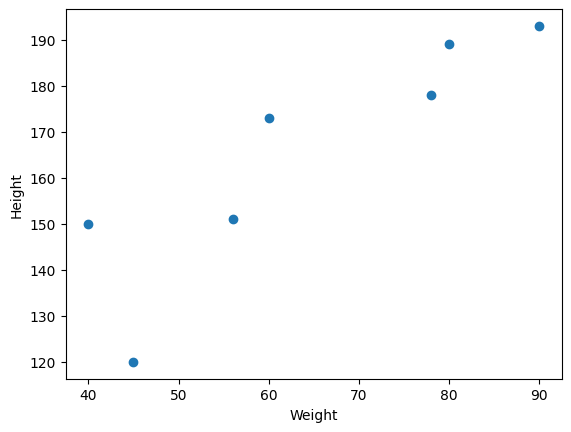

In [6]:
## Scatter plot 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
## correlation 
df.corr()

,Weight,Height
Weight,1.000000,0.879686
Height,0.879686,1.000000


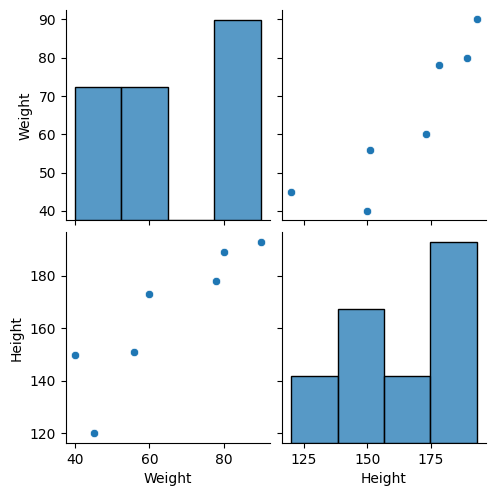

In [11]:
##Seaborn for Visualisation 
import seaborn as sns
sns.pairplot(df)

In [15]:
## independent and dependent features
X = df[['Weight']]
y = df['Height']

In [16]:
X_series = df['Weight']
np.array(X_series).shape

(7,)

In [18]:
np.array(y).shape

(7,)

In [19]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
## Standardize the data
from sklearn.preprocessing import StandardScaler


In [23]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

In [25]:
X_test

array([[-1.13605121],
       [ 0.71987403]])

In [26]:
## apply linear regression
from sklearn.linear_model import LinearRegression


In [28]:
regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [31]:
print("Coffeficient or Slope : ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

Coffeficient or Slope :  [17.03851852]
Intercept:  171.2


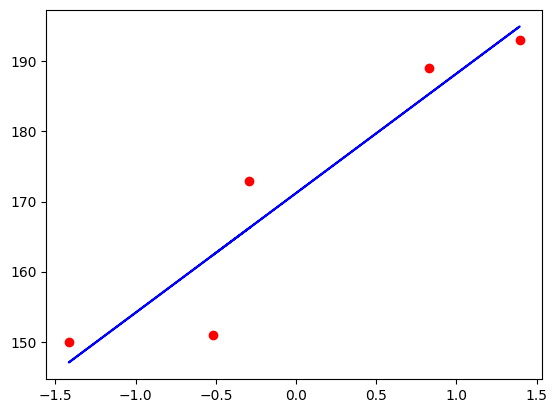

In [33]:
##plot Training Data 
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

In [34]:
##prediction for the test data
y_pred = regressor.predict(X_test)
y_pred

array([151.84337045, 183.46558704])

In [41]:
## performance metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  521.9364415303993
MAE :  18.65447874493927
RMSE :  22.845928335928907


In [48]:
#r squared
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

R2 Score :  0.3793859197022601


In [49]:
#adjusted r squared
adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2 Score : ", adj_r2)

Adjusted R2 Score :  0.2552631036427121


In [52]:
#olS Linear Regression
import statsmodels.api as sm

In [53]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.238
Method:                 Least Squares   F-statistic:                            0.03957
Date:                Tue, 13 Aug 2024   Prob (F-statistic):                       0.852
Time:                        01:30:55   Log-Likelihood:                         -32.812
No. Observations:                   5   AIC:                                      67.62
Df Residuals:                       4   BIC:                                      67.23
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\manna\.conda\envs\myenv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [57]:
regressor.predict(scaler.transform(([[80]])))

c:\Users\manna\.conda\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([185.38208502])